In [108]:
import pandas as pd
import glob
import requests
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

Gathering Data source 1

In [109]:
# DOWNLOADED MANUALLY AND UPLOADED
archive_df=pd.read_csv('twitter-archive-enhanced.csv')
archive_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None


Gathering Data source 2

In [110]:
# DOWNLOADING PROGRAMATICALLY
if not os.path.exists('downloaded_programmatically'):
    os.makedirs('downloaded_programmatically')
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response= requests.get(url)
with open (os.path.join('downloaded_programmatically', url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
os.listdir('downloaded_programmatically')
image_predictions_df=pd.read_csv(os.path.join('downloaded_programmatically', url.split('/')[-1]), sep='\t')
image_predictions_df.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


Gathering Data source 3 

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [111]:
# creating dataframe
df_list=[]
with open('tweet-json.txt', encoding='utf-8') as file:
#     print(file.readline())
    for line in file:
        tweet=json.loads(line)
        tweet_id=tweet['id']
        retweet_count=tweet['retweet_count']
        fav_count = tweet['favorite_count']
        df_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': fav_count})
api_df= pd.DataFrame(df_list)
api_df.head(1)

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193


## assesing data##

In [7]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [50]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


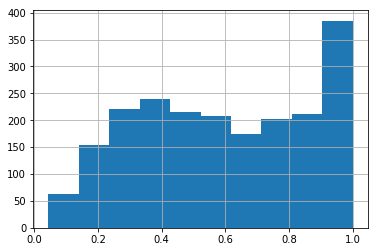

In [58]:
image_predictions_df.p1_conf.hist()

In [59]:
image_predictions_df.p1_conf.describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [39]:
image_predictions_df.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher', 'Bernese_mountain_dog',
       'box_turtle', 'chow', 'shopping_cart', 'miniature_poodle',
       'golden_retriever', 'Gordon_setter', 'Walker_hound', 'pug',
       'bloodhound', 'Lhasa', 'English_setter', 'hen', 'desktop_computer',
       'Italian_greyhound', 'Maltese_dog', 'three-toed_sloth', 'ox',
       'malamute', 'guinea_pig', 'soft-coated_wheaten_terrier',
       'Chihuahua', 'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama', 'Chesapeake_Bay_retriever',
       'curly-coated_retriever', 'dalmatian', 'Ibizan_hound',
       'Border_collie', 'Labrador_retriever', 'seat_belt', 'snail',
       'miniature_schnauzer', 'Airedale', 'triceratops', 'swab', 'hay',
       'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 'teddy', 

In [65]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
archive_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

## Assesing data ##


archive_df  table:
- Dog stage classification was in different columns, which considered as a tidiness issue, each variable like (dog stage) should be in a separate column.
- Timestamp column is object, which is invalid for time analysis. (quality issue)
- Missing names. (quality issue)
- Inaccurate data like (55 dog named 'a', 8 named 'the' and 7 named 'an') (quality issue)
- Some dog ratings have overestimating numbers (higher than 20  to hundreds!, in contrary there are low ones (lower than 7!) (quality issue)
- rating_denominator have sometimes different  numbers other than 10. (quality issue)

Image prediction data:
- columns undefined.(quality  issue)
- Irrelevant stuff in classification prediction columns.(content issue)


api_df:
- retweet counts and favourite counts are columns related to archive table (tideness issue)


exploring data
- first prediction is more reliable than second and third.
- in first prediction, below 0.25 belongs to stuff other than dog types.

plan:
- first: restricting data to original tweets.
- drop from archive data id`s that has no  images in image prediction table.
- confirm that the id numbers and counts are the same for tables.
- continue cleaning.

notes:
- no null values in image prediction, no duplicated rows.


## Cleaning##

In [112]:
#making copies
archive_df_c=archive_df.copy()
image_predictions_df_c=image_predictions_df.copy()
api_df_c=api_df.copy()

Tideness #1

#### Define: 
Doge stage must be in one column


#### Code

In [113]:
#first, further investigation needed for if there are dogs with two or more types:
(archive_df_c.loc[:, 'doggo':"puppo"] != 'None').sum() 
#found that sum of them is higher than the number 
# of records so it must be rows with two or more classification

doggo      97 
floofer    10 
pupper     257
puppo      30 
dtype: int64

In [114]:
archive_df_c.doggo=archive_df_c.doggo.replace('None', '')
archive_df_c.floofer=archive_df_c.floofer.replace('None', '')
archive_df_c.pupper=archive_df_c.pupper.replace('None', '')
archive_df_c.puppo=archive_df_c.puppo.replace('None', '')
# combining in one column
archive_df_c['dog_stage']=archive_df_c.doggo+archive_df_c.floofer+archive_df_c.pupper+archive_df_c.puppo

# check douple types
archive_df_c['dog_stage'].value_counts()

# adding (-) to them
archive_df_c.loc[archive_df_c.dog_stage=='doggopupper', 'dog_stage']='doggo-pupper'
archive_df_c.loc[archive_df_c.dog_stage=='doggofloofer', 'dog_stage']='doggo-floofer'
archive_df_c.loc[archive_df_c.dog_stage=='doggopuppo', 'dog_stage']='doggo-puppo'

#drop columns
archive_df_c.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)


#### Test

In [20]:
archive_df_c.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,


(quality#1, accuracy) 

#### Define
modify the douple- stage tweets

#### Code

In [115]:
#investigating the douple type dogs by viewing the text:
pd.set_option('display.max_colwidth', -1)
print(archive_df_c.query('dog_stage == "doggo-floofer"').text)
print(archive_df_c.query('dog_stage == "doggo-puppo"').text)
print(archive_df_c.query('dog_stage == "doggo-pupper"').text)
# according to the tweet text, some errors must be modified.  
archive_df_c.dog_stage=archive_df_c.dog_stage.replace('doggo-floofer', 'floofer')
archive_df_c.dog_stage=archive_df_c.dog_stage.replace('doggo-puppo', 'puppo')
# but the doggo-pupper mix was due to existence of both in image, so it is not error.

200    At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
Name: text, dtype: object
191    Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
Name: text, dtype: object
460     This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
531     Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho                    
565     Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze                                                                                               
575     This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 

#### Test

In [25]:
archive_df_c.dog_stage.value_counts()

                1976
pupper          245 
doggo           83  
puppo           30  
doggo-pupper    12  
floofer         10  
Name: dog_stage, dtype: int64

Quality#2, inconsistent 

#### Define
Replacing the empty cells by NaN, to avoid different representations in table

#### Code

In [116]:
# replacing empty cells with pandas NaN
archive_df_c=archive_df_c.replace('', np.nan)

#### Test

In [29]:
archive_df_c.dog_stage.value_counts()

pupper          245
doggo           83 
puppo           30 
doggo-pupper    12 
floofer         10 
Name: dog_stage, dtype: int64

Quality#3 (accuracy)

#### Define
    Modifying the three table to be the same id`s number and relevent content, by
First: drop from archieve table tweets with no images

#### Code

In [117]:
print(archive_df_c.shape)
# creating a list of tweets with images.
tweets_with_image = list(image_predictions_df_c.tweet_id.unique())
# confirming that all tweet with images exists in archive table
len(tweets_with_image)== archive_df_c.tweet_id.isin(tweets_with_image).sum()
# clean
archive_df_c=archive_df_c[archive_df_c.tweet_id.isin(tweets_with_image)]

(2356, 14)


#### Test

In [41]:
archive_df_c.shape

(2075, 14)

Quality#4 (accuracy)

#### Define
second: Dropping from archieve table retweets & replies

#### Code

In [118]:
retweet=archive_df_c.query('retweeted_status_id != "NaN"')
reply=archive_df_c.query('in_reply_to_status_id != "NaN"')
## testing original
print(archive_df_c.shape)

archive_df_c.drop(retweet.index, inplace=True)
## testing first drop
print(archive_df_c.shape)

archive_df_c.drop(reply.index, inplace=True)
## testing second drop
print(archive_df_c.shape)


(2075, 14)
(1994, 14)
(1971, 14)


#### Define
Third: removing retweets from image table

#### Code

In [119]:
lst=list(archive_df_c.tweet_id.unique())
print(image_predictions_df_c.shape)
image_predictions_df_c=image_predictions_df_c[image_predictions_df_c.tweet_id.isin(lst)]

(2075, 12)


#### Test

In [44]:
print(image_predictions_df_c.shape)

(1971, 12)


#### Define
Fourth: removing unneeded id`s from api table depending on the pre-cleaned archive table.

#### Code

In [120]:
print(api_df_c.shape)
api_df_c=api_df_c[api_df_c.tweet_id.isin(lst)]


(2354, 3)


#### Test

In [46]:
print(api_df_c.shape)

(1971, 3)


Tideness #2 

#### Define 
    Merging all three table by
First: merging tables Api and Archive because Api table columns belongs to tweets id (same observational unit)

#### Code


In [121]:
df_arch_api=pd.merge(archive_df_c, api_df_c, on='tweet_id', how='outer')
# df_new = df.join(neighborhood_dummies)

#### Test


In [125]:
df_arch_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 16 columns):
tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null object
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1971 non-null object
dog_stage                     303 non-null object
favorite_count                1971 non-null int64
retweet_count                 1971 non-null int64
dtypes: float64(4), int64(5), object(7)
memory usage: 261.8+ KB


#### Define
Second: Merging image table to them

#### Code


In [126]:
df_all=pd.merge(df_arch_api, image_predictions_df_c, on='tweet_id', how='outer')

#### Test

In [127]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 27 columns):
tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null object
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1971 non-null object
dog_stage                     303 non-null object
favorite_count                1971 non-null int64
retweet_count                 1971 non-null int64
jpg_url                       1971 non-null object
img_num                       1971 non-null

Quality #5

#### Define
Drop unneeded columns

#### Code


In [128]:
df_all=df_all.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                               'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test


In [130]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             303 non-null object
favorite_count        1971 non-null int64
retweet_count         1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float6

Quality #7 (invalid)

#### Define
Converting timestamp to day time to  be used in analysis

#### Code


In [131]:
df_all.timestamp.isnull().sum()
print(df_all.timestamp.dtype)
df_all.timestamp=pd.to_datetime(df_all.timestamp)
print(df_all.timestamp.dtype)
df_all.timestamp= df_all.timestamp.dt.date

object
datetime64[ns]


#### Test

In [132]:
df_all.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


Quality #8

#### Define
 Renaming some columns

#### Code

In [133]:
print(df_all.columns)

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'favorite_count', 'retweet_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')


In [176]:
new_headers=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
             'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
             'favorite_count', 'retweet_count', 'jpg_url', 'img_num', 
             'first_prediction_type', 'first_prediction_confidence', 'first_prediction_result',
             'second_prediction_type','second_prediction_confidence', 'second_prediction_result',
             'third_prediction_type', 'third_prediction_confidence', 'third_prediction_result']
df_all.columns=new_headers

#### Test

In [177]:
df_all.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'favorite_count', 'retweet_count', 'jpg_url', 'img_num',
       'first_prediction_type', 'first_prediction_confidence',
       'first_prediction_result', 'second_prediction_type',
       'second_prediction_confidence', 'second_prediction_result',
       'third_prediction_type', 'third_prediction_confidence',
       'third_prediction_result'],
      dtype='object')

Quality #9


#### Define
 modify some wrong ratings

In [136]:
df_all.rating_numerator.value_counts()
#it is found that most common
# and reasonable rates between 6 and 15

12      446
10      417
11      392
13      253
9       150
8       95 
7       52 
5       33 
14      33 
6       32 
3       19 
4       16 
2       9  
1       5  
1776    1  
24      1  
26      1  
420     1  
27      1  
44      1  
45      1  
50      1  
60      1  
75      1  
80      1  
84      1  
88      1  
99      1  
121     1  
144     1  
165     1  
204     1  
0       1  
Name: rating_numerator, dtype: int64

In [137]:
df_all.query('rating_numerator>15 or rating_numerator<6')[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
39,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
232,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
320,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
382,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
499,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
526,Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,5,10
549,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
550,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,3,10
644,This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,4,10
658,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150


#### Code

In [178]:
df_all.at[39,'rating_numerator']=14 #extracted wrong
df_all.at[175,'rating_numerator']=11  #he was kidding, he put the right rating after that.
df_all.at[499,'rating_numerator']=10 #extracted wrong
df_all.at[320,'rating_numerator']=12 #sum ratings for dogs, average taken.

#### Test

In [139]:
df_all.query('rating_numerator>15 or rating_numerator<6')[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
232,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
382,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
526,Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,5,10
549,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
550,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,3,10
644,This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,4,10
658,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
665,Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl,4,10
700,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,5,10
722,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10


### saving

In [179]:
df_all.to_csv('twitter_archive_master.csv', index= False)

In [180]:
df_master= pd.read_csv('twitter_archive_master.csv', parse_dates=['timestamp'])
df_master.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,img_num,first_prediction_type,first_prediction_confidence,first_prediction_result,second_prediction_type,second_prediction_confidence,second_prediction_result,third_prediction_type,third_prediction_confidence,third_prediction_result
0,892420643555336193,2017-08-01,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


# visualization

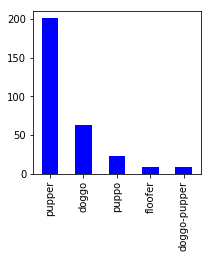

In [181]:
# asking abount most common dog stage:
df_master.dog_stage.value_counts().plot(kind='bar', color='blue', figsize=(3,3));

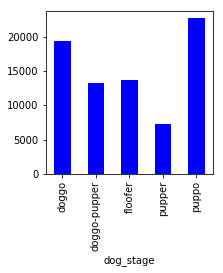

In [314]:
df_master.groupby('dog_stage').favorite_count.mean().plot(kind='bar', color= 'blue', figsize=(3,3));

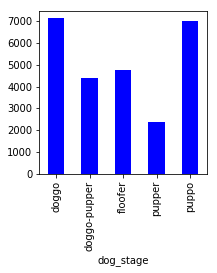

In [318]:
df_master.groupby('dog_stage').retweet_count.mean().plot(kind='bar', color='blue',figsize=(3,3));

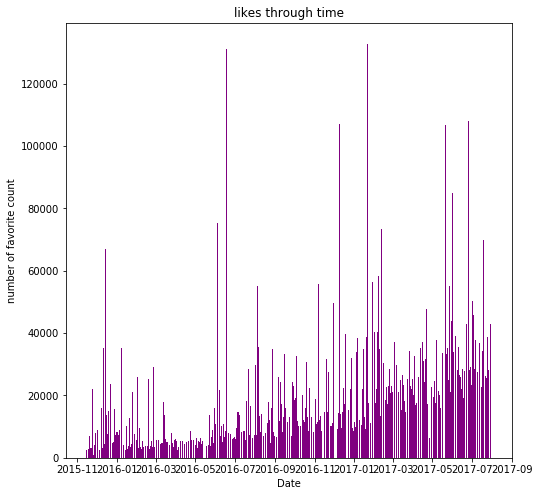

In [184]:
# Create figure 
fig, ax = plt.subplots(figsize=(8, 8))

# Add x-axis and y-axis
ax.bar(df_master.timestamp.values,
       df_master['favorite_count'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="number of favorite count",
       title="likes through time")

plt.show()

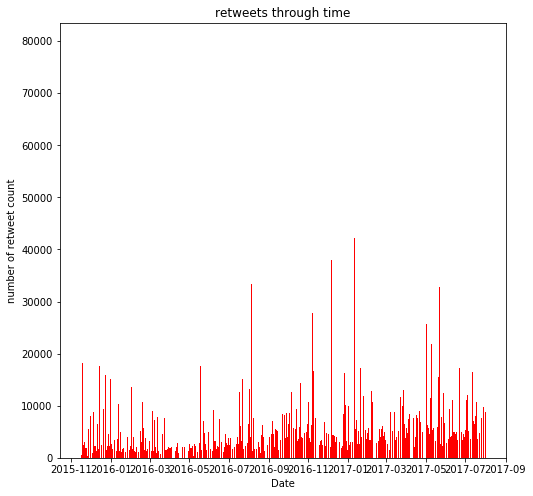

In [186]:
# Create figure 
fig, ax = plt.subplots(figsize=(8, 8))

# Add x-axis and y-axis
ax.bar(df_master.timestamp.values,
       df_master['retweet_count'],
       color='red')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="number of retweet count",
       title="retweets through time")

plt.show()

In [187]:
df_master.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,img_num,first_prediction_type,first_prediction_confidence,first_prediction_result,second_prediction_type,second_prediction_confidence,second_prediction_result,third_prediction_type,third_prediction_confidence,third_prediction_result
0,892420643555336193,2017-08-01,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


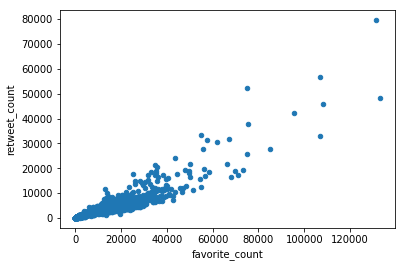

In [188]:
#is there a relation between the favorite_count and retweet_count?
df_master.plot(x='favorite_count', y='retweet_count', kind='scatter');

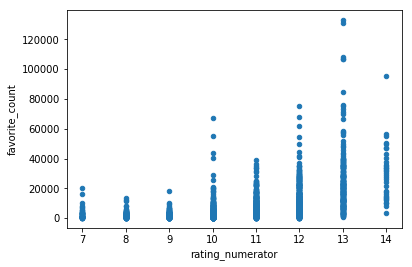

In [189]:
# is there a relation between favorite count and rating?
#filtering by important conditions to prevent misleading
df_rating=df_master.query('(15>rating_numerator > 6) and (rating_denominator == 10)')

df_rating.plot(x='rating_numerator', y='favorite_count', kind='scatter');

In [297]:
# finding most tweeted and liked post.
df_master.query('favorite_count==favorite_count.max()').favorite_count
df_master.query('retweet_count==retweet_count.max()').retweet_count

769    79515
Name: retweet_count, dtype: int64

In [193]:

df_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'favorite_count', 'retweet_count', 'jpg_url', 'img_num',
       'first_prediction_type', 'first_prediction_confidence',
       'first_prediction_result', 'second_prediction_type',
       'second_prediction_confidence', 'second_prediction_result',
       'third_prediction_type', 'third_prediction_confidence',
       'third_prediction_result'],
      dtype='object')

In [241]:
from collections import Counter
lst=Counter(df_master['first_prediction_type']).most_common()[:6] 
lst

[('golden_retriever', 137),
 ('Labrador_retriever', 94),
 ('Pembroke', 88),
 ('Chihuahua', 78),
 ('pug', 54),
 ('chow', 41)]

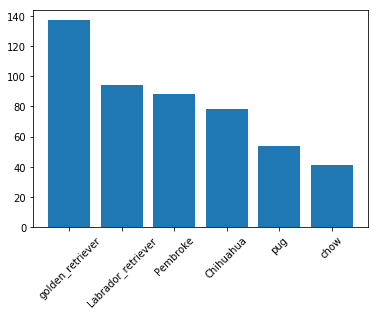

In [270]:
locations = range(len(lst))
heights=[lst[0][1], lst[1][1], lst[2][1],lst[3][1], lst[4][1], lst[5][1]]
labels=[lst[0][0], lst[1][0], lst[2][0], lst[3][0], lst[4][0], lst[5][0]]

plt.bar(locations, heights)
plt.xticks(locations, labels, rotation=45);

In [309]:
filtered_true=df_master.query('first_prediction_result == True')
filtered_true.first_prediction_type.nunique()


111

In [326]:
dfo= filtered_true.groupby('first_prediction_type').favorite_count.mean()
dfo.golden_retriever

12361.131386861314

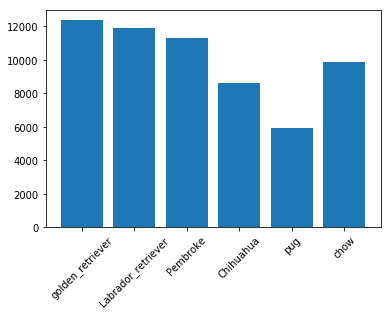

In [312]:
mean1=dfo.golden_retriever
mean2=dfo.Labrador_retriever
mean3=dfo.Pembroke
mean4=dfo.Chihuahua
mean5=dfo.pug
mean6=dfo.chow
heights=[mean1, mean2, mean3, mean4, mean5, mean6]
locations = range(len(lst))
labels=['golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua', 'pug', 'chow']
plt.bar(locations, heights)
plt.xticks(locations, labels, rotation=45);
# .favorite_count.mean().plot(kind='bar', color= 'blue', figsize=(3,3));